<a href="https://colab.research.google.com/github/SilvanaCicchitti/TelecomX-parte2/blob/main/TelecomX_version2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Challenge Telecom X - Parte 2

In [302]:
import pandas as pd
ruta= '/content/datos_tratados.csv'
datos= pd.read_csv(ruta)
datos

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Daily
0,0002-ORFBO,0,Female,0,1,1,9.0,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.60,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9.0,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.90,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4.0,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13.0,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3.0,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,9987-LUTYD,0,Female,0,0,0,13.0,1,No,DSL,...,No,Yes,No,No,One year,0,Mailed check,55.15,742.90,1.84
7028,9992-RRAMN,1,Male,0,1,0,22.0,1,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,1,Electronic check,85.10,1873.70,2.84
7029,9992-UJOEL,0,Male,0,0,0,2.0,1,No,DSL,...,No,No,No,No,Month-to-month,1,Mailed check,50.30,92.75,1.68
7030,9993-LHIEB,0,Male,0,1,1,67.0,1,No,DSL,...,Yes,Yes,No,Yes,Two year,0,Mailed check,67.85,4627.65,2.26


In [303]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   int64  
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   int64  
 5   Dependents        7032 non-null   int64  
 6   tenure            7032 non-null   float64
 7   PhoneService      7032 non-null   int64  
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 


In [304]:
datos.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total',
       'Charges.Daily'],
      dtype='object')

In [305]:
#eliminar columna cutomerID
datos= datos.drop('customerID', axis=1)

In [306]:
datos.columns

Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total', 'Charges.Daily'],
      dtype='object')

 Agrupación de No y No service para r
 educir multicolinealidad y simplificar los datos sin perder relevancia para el modelo predictivo.

In [307]:
# para crear uno nuevo
df_clean = datos.copy()

# === Etapa 1: Agrupar "No internet service" como "No"
cols_to_fix = ['OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies']

for col in cols_to_fix:
    df_clean[col] = df_clean[col].replace('No internet service', 'No')



In [308]:
#ver valores de las columnas modificadas
for col in cols_to_fix:
    print(df_clean[col].unique())

['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
['Yes' 'No']
['No' 'Yes']


In [309]:
# === Etapa 2: One-hot encoding

categorical_cols = [
       'Churn', 'gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'
]

df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)


df_encoded

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Charges.Daily,Churn_1,gender_Male,Partner_1,Dependents_1,PhoneService_1,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_1,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,9.0,65.60,593.30,2.19,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0,9.0,59.90,542.40,2.00,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4.0,73.90,280.85,2.46,True,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1,13.0,98.00,1237.85,3.27,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1,3.0,83.90,267.40,2.80,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,13.0,55.15,742.90,1.84,False,False,False,False,True,...,False,True,False,False,True,False,False,False,False,True
7028,0,22.0,85.10,1873.70,2.84,True,True,True,False,True,...,False,False,False,True,False,False,True,False,True,False
7029,0,2.0,50.30,92.75,1.68,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
7030,0,67.0,67.85,4627.65,2.26,False,True,True,True,True,...,True,True,False,True,False,True,False,False,False,True


In [310]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   tenure                                 7032 non-null   float64
 2   Charges.Monthly                        7032 non-null   float64
 3   Charges.Total                          7032 non-null   float64
 4   Charges.Daily                          7032 non-null   float64
 5   Churn_1                                7032 non-null   bool   
 6   gender_Male                            7032 non-null   bool   
 7   Partner_1                              7032 non-null   bool   
 8   Dependents_1                           7032 non-null   bool   
 9   PhoneService_1                         7032 non-null   bool   
 10  MultipleLines_No phone service         7032 non-null   bool   
 11  Mult

In [311]:
#verificar si hay nulos
df_encoded.isnull().sum()

,0
SeniorCitizen,0
tenure,0
Charges.Monthly,0
Charges.Total,0
Charges.Daily,0
Churn_1,0
gender_Male,0
Partner_1,0
Dependents_1,0
PhoneService_1,0


# Normalización/Estandarización

In [312]:
from sklearn.preprocessing import MinMaxScaler

In [313]:
# Seleccionando solo columnas numéricas (excepto la variable target, si ya está separada)
columnas_numericas = df_encoded.select_dtypes(include=['int64', 'float64']).columns
columnas_numericas

Index(['SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total',
       'Charges.Daily'],
      dtype='object')

In [314]:
scaler = MinMaxScaler()
df_encoded[columnas_numericas] = scaler.fit_transform(df_encoded[columnas_numericas])
df_encoded.head()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Charges.Daily,Churn_1,gender_Male,Partner_1,Dependents_1,PhoneService_1,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_1,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.112676,0.471144,0.066294,0.471642,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0.0,0.112676,0.414428,0.060420,0.414925,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0.0,0.042254,0.553731,0.030239,0.552239,True,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1.0,0.169014,0.793532,0.140670,0.794030,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1.0,0.028169,0.653234,0.028687,0.653731,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True


In [315]:
df_encoded.columns

Index(['SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total',
       'Charges.Daily', 'Churn_1', 'gender_Male', 'Partner_1', 'Dependents_1',
       'PhoneService_1', 'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_1',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

# Análisis de correlación

In [316]:
corr = df_encoded.corr()

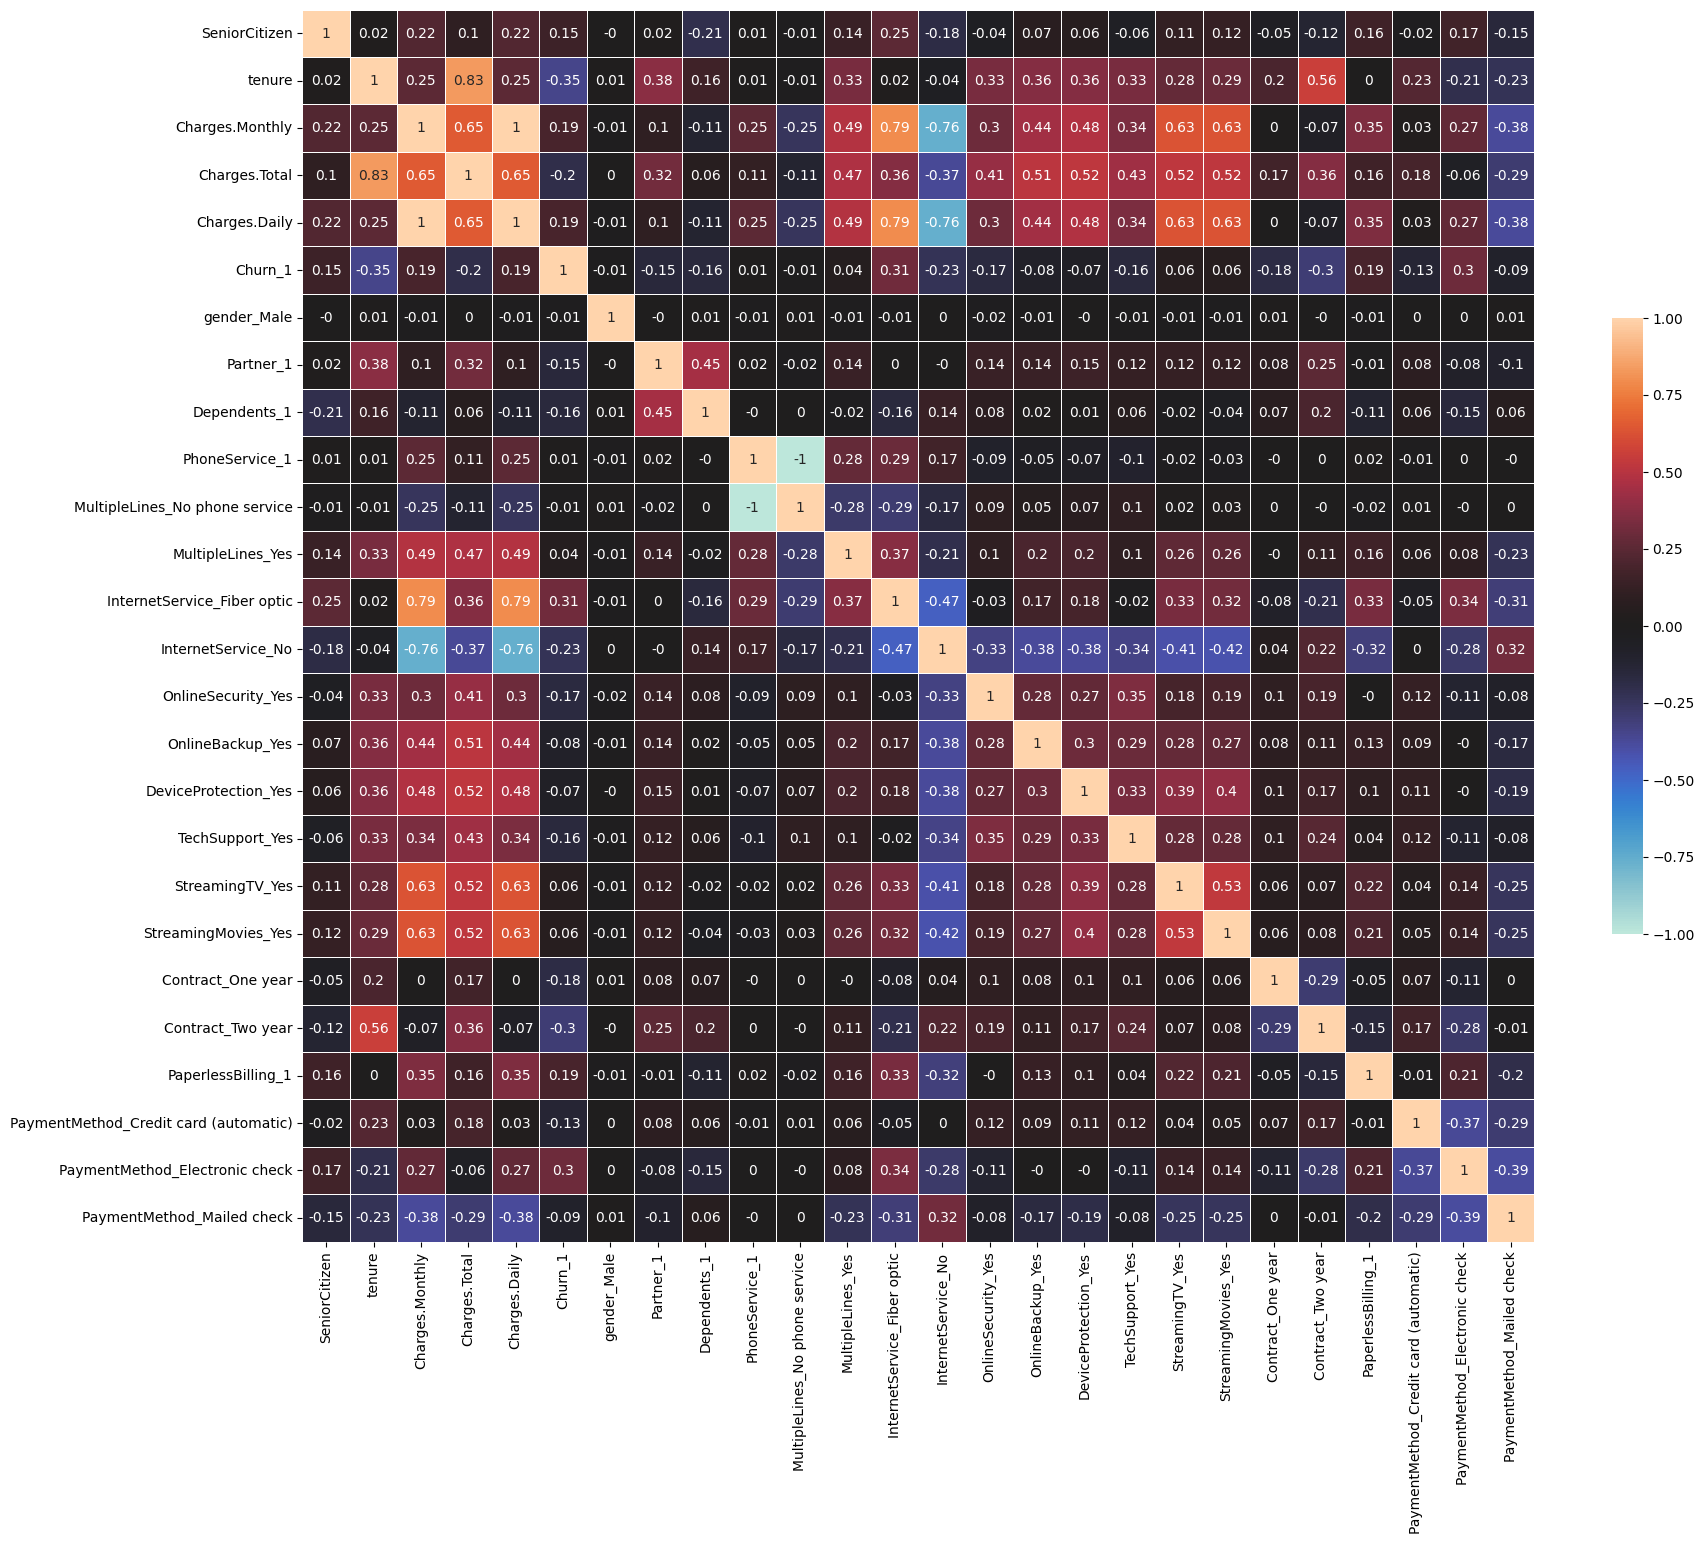

In [317]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(20,16))
ax = sns.heatmap(np.round(corr, 2), vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
plt.show()

In [318]:
# Definir la variable objetivo
target_var = 'Churn_1'

# Umbral mínimo de correlación absoluta para selección
limite = 0.1

variables_relevantes= corr.index[abs(corr[target_var]) >= limite].tolist()
variables_relevantes


['SeniorCitizen',
 'tenure',
 'Charges.Monthly',
 'Charges.Total',
 'Charges.Daily',
 'Churn_1',
 'Partner_1',
 'Dependents_1',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_Yes',
 'TechSupport_Yes',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_1',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check']

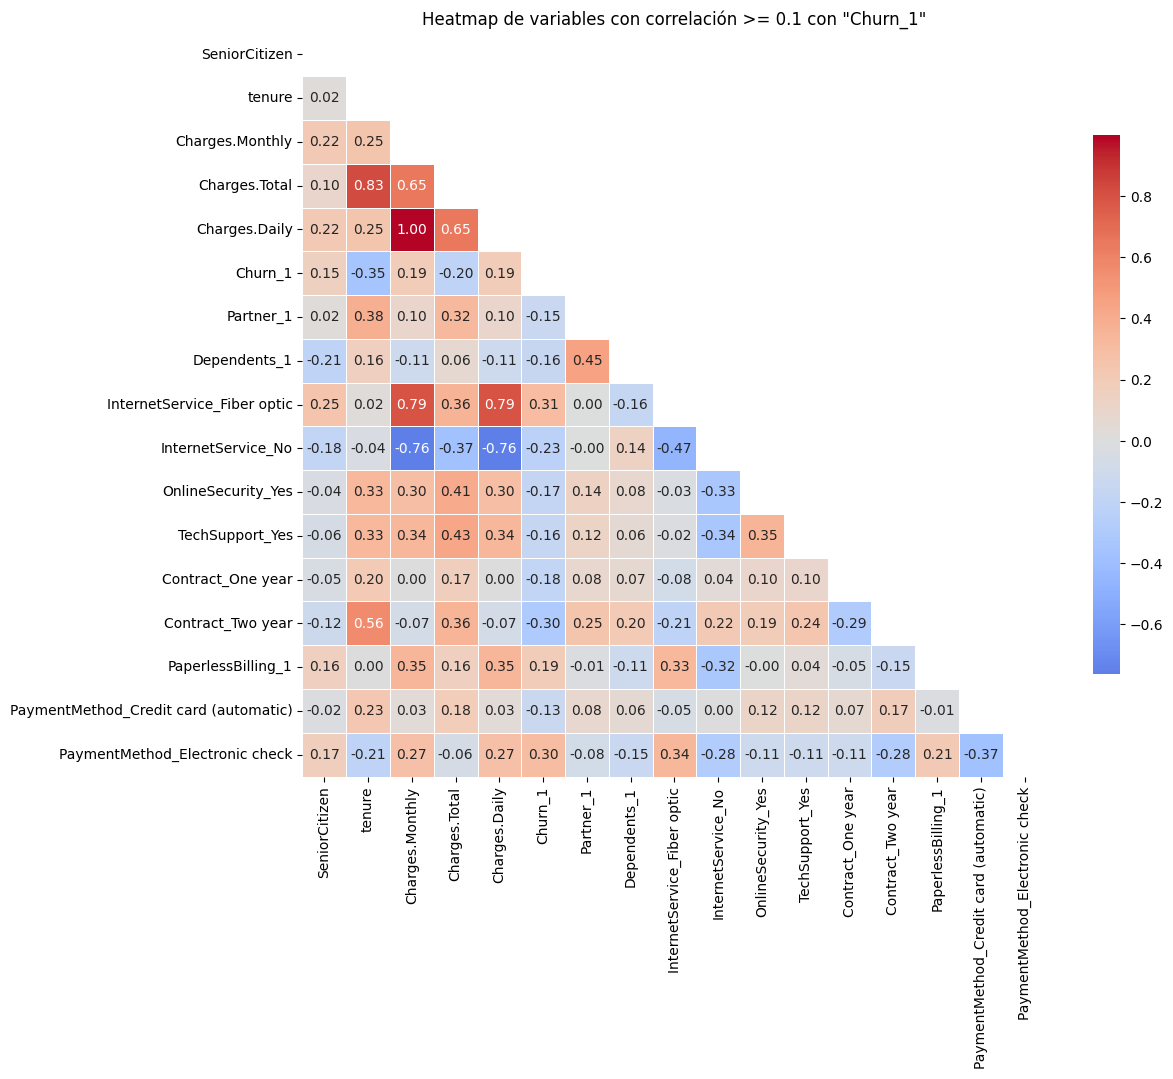

In [319]:
# Crear una matriz de correlación solo con las variables seleccionadas
corr_seleccionadas = df_encoded[variables_relevantes].corr()

# Generar una máscara para ocultar el triángulo superior de la matriz (incluida la diagonal)
mascara = np.triu(np.ones_like(corr_seleccionadas, dtype=bool))

# Graficar el heatmap con la máscara aplicada para mejor visualización
plt.figure(figsize=(12,10))
sns.heatmap(
    corr_seleccionadas,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    mask=mascara
)
plt.title(f'Heatmap de variables con correlación >= {limite} con "{target_var}"')
plt.show()

#Análisis de Multicolinealidad

In [320]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [321]:
#variables independientes

X= df_encoded.drop(columns=['Churn_1'])

In [322]:
#Añadir constante
X_const = add_constant(X)

In [323]:
#calcular VIF

X_const = X_const.astype(float)

vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

display(vif_data.sort_values(by='VIF', ascending=False))



/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
9,PhoneService_1,inf
10,MultipleLines_No phone service,inf
5,Charges.Daily,3.210914e+04
3,Charges.Monthly,1.643852e+04
12,InternetService_Fiber optic,1.485145e+02
13,InternetService_No,1.042269e+02
19,StreamingMovies_Yes,2.415472e+01
18,StreamingTV_Yes,2.405952e+01
4,Charges.Total,1.081045e+01
2,tenure,7.584406e+00


In [324]:
#X_filtrado= X_const.drop(columns=["PhoneService_1","Charges.Daily","Charges.Total"], inplace=True)
X_filtrado = X_const.copy()
cols_to_drop = ["PhoneService_1","Charges.Daily","Charges.Total","InternetService_No"]
X_filtrado.drop(columns=cols_to_drop, inplace=True)

X_filtrado = X_filtrado.astype(float) #para que funcione VIF

vif_data = pd.DataFrame()
vif_data["feature"] = X_filtrado.columns
vif_data["VIF"] = [variance_inflation_factor(X_filtrado.values, i) for i in range(X_filtrado.shape[1])]

display(vif_data.sort_values(by='VIF', ascending=False))

,feature,VIF
3,Charges.Monthly,22.336364
0,const,17.264479
9,InternetService_Fiber optic,7.553029
2,tenure,2.826562
17,Contract_Two year,2.630079
15,StreamingMovies_Yes,2.417444
14,StreamingTV_Yes,2.399620
20,PaymentMethod_Electronic check,1.973257
13,TechSupport_Yes,1.848965
21,PaymentMethod_Mailed check,1.837626


#Modelos predictivos

In [325]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [326]:
#Separar x e y
# uso X filtrado
X = X_filtrado.drop(columns=['const'])
y= df_encoded['Churn_1']

In [327]:
#dividir datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)

In [328]:
# Normalizar
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [329]:
# Balancear datos de entrenamiento
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

## Regresión lineal

In [330]:
# Instanciar y entrenar
lr = LogisticRegression(random_state=42)
lr.fit(X_train_balanced, y_train_balanced)

# Predicciones
y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

# Evaluación
print("Regresión Lineal")
print("Exactitud:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Regresión Logística
Exactitud: 0.7491467576791809
ROC AUC: 0.840852583442943
Matriz de Confusión:
 [[951 340]
 [101 366]]
              precision    recall  f1-score   support

       False       0.90      0.74      0.81      1291
        True       0.52      0.78      0.62       467

    accuracy                           0.75      1758
   macro avg       0.71      0.76      0.72      1758
weighted avg       0.80      0.75      0.76      1758



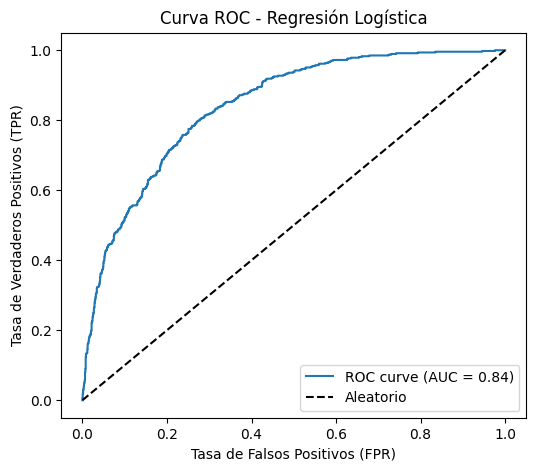

In [331]:
#graficar curva ROC
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

fpr, tpr, thresholds = roc_curve(y_test, y_prob_lr)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Regresión Logística')
plt.legend(loc='lower right')
plt.show()

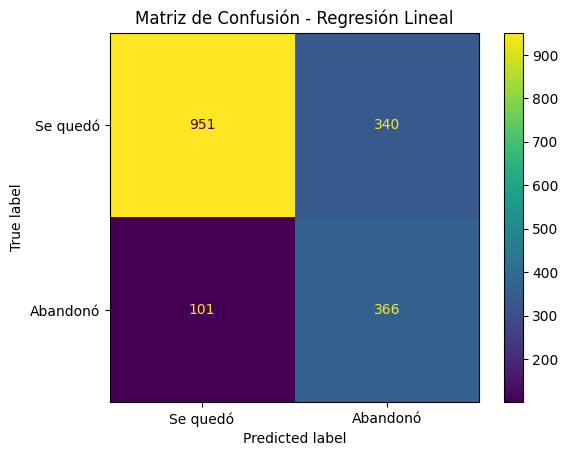

In [332]:
#graficar matriz de confusion
matriz_confusion = confusion_matrix(y_test, y_pred_lr)
visualizacion_matriz = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=['Se quedó', 'Abandonó'])
visualizacion_matriz.plot()
plt.title('Matriz de Confusión - Regresión Lineal')
plt.show()



## Random Forest

In [333]:
# Instanciar y entrenar
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_balanced, y_train_balanced)

# Predicciones
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Evaluación
print("Random Forest")
print("Exactitud:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest
Exactitud: 0.7753128555176336
ROC AUC: 0.8091473336241515
Matriz de Confusión:
 [[1095  196]
 [ 199  268]]
              precision    recall  f1-score   support

       False       0.85      0.85      0.85      1291
        True       0.58      0.57      0.58       467

    accuracy                           0.78      1758
   macro avg       0.71      0.71      0.71      1758
weighted avg       0.77      0.78      0.78      1758



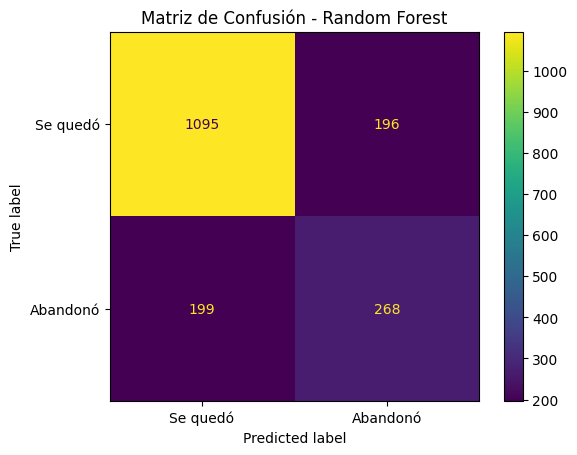

In [334]:
#graficar matriz de confusion
matriz_confusion = confusion_matrix(y_test, y_pred_rf)
visualizacion_matriz = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=['Se quedó', 'Abandonó'])
visualizacion_matriz.plot()
plt.title('Matriz de Confusión - Random Forest')
plt.show()

## Análisis de importancia de las variables

/tmp/ipython-input-973025070.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Regresión Logística', y='Variable', data=rl_plot_data, ax=axes[0], palette='viridis')
/tmp/ipython-input-973025070.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Random Forest', y='Variable', data=rf_plot_data, ax=axes[1],palette='viridis')


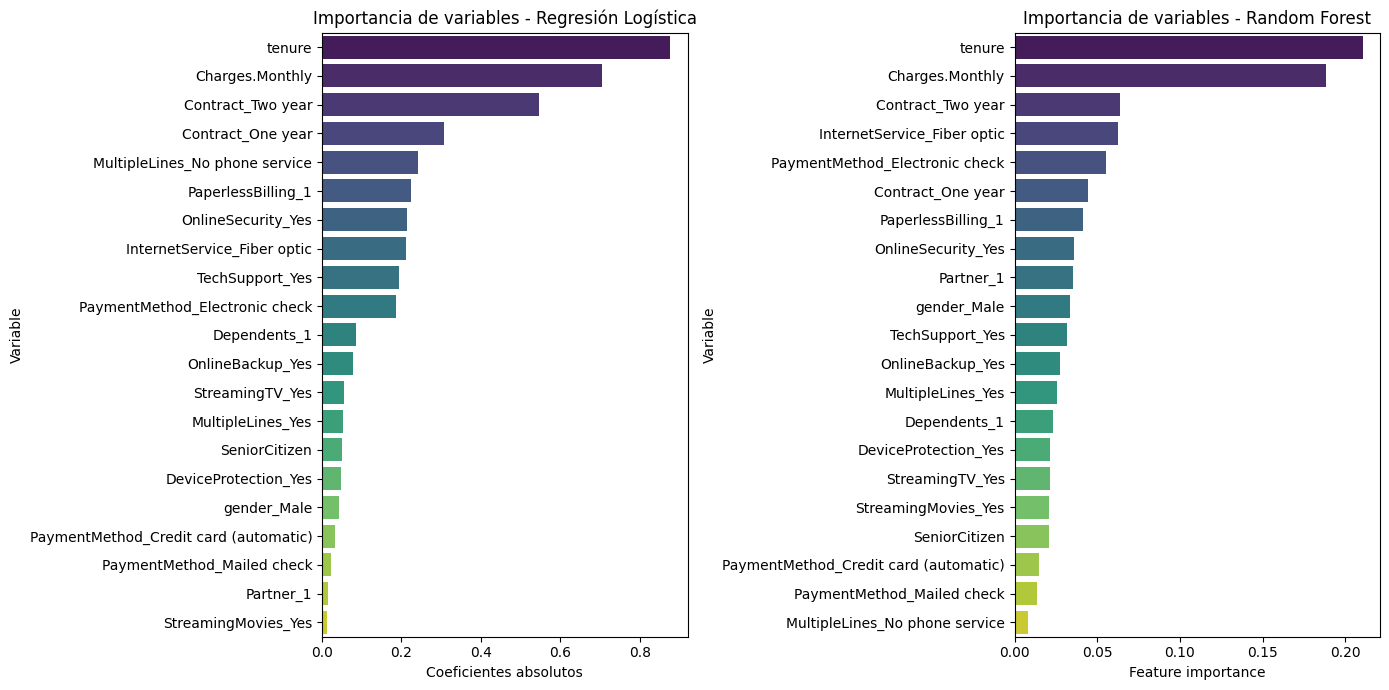

In [335]:

# Importancia en Regresión Logística (coeficientes absolutos)
lr_importancia = np.abs(lr.coef_[0])

# Importancia en Random Forest
rf_importancia = rf.feature_importances_

# DataFrame con ambas
nombres_variables = X_train.columns
importancia_df = pd.DataFrame({
    'Variable': nombres_variables,
    'Regresión Logística': lr_importancia,
    'Random Forest': rf_importancia
})

# Graficar
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Regresión Logística
rl_plot_data = importancia_df.sort_values(by='Regresión Logística', ascending=False)
sns.barplot(x='Regresión Logística', y='Variable', data=rl_plot_data, ax=axes[0], palette='viridis')
axes[0].set_title('Importancia de variables - Regresión Logística')
axes[0].set_xlabel('Coeficientes absolutos')
axes[0].set_ylabel('Variable')

# Random Forest
rf_plot_data = importancia_df.sort_values(by='Random Forest', ascending=False)
sns.barplot(x='Random Forest', y='Variable', data=rf_plot_data, ax=axes[1],palette='viridis')
axes[1].set_title('Importancia de variables - Random Forest')
axes[1].set_xlabel('Feature importance')
axes[1].set_ylabel('Variable')

plt.tight_layout()
plt.show()

In [336]:
#tabla comparativa
tabla_comparativa = importancia_df.sort_values(by='Regresión Logística', ascending=False)
tabla_comparativa

,Variable,Regresión Logística,Random Forest
1,tenure,0.876639,0.210482
2,Charges.Monthly,0.704263,0.188564
16,Contract_Two year,0.547155,0.063962
15,Contract_One year,0.307343,0.044486
6,MultipleLines_No phone service,0.241386,0.008066
17,PaperlessBilling_1,0.223186,0.041222
9,OnlineSecurity_Yes,0.214749,0.035679
8,InternetService_Fiber optic,0.212732,0.062366
12,TechSupport_Yes,0.194816,0.031933
19,PaymentMethod_Electronic check,0.186402,0.055273


In [337]:
top_15 = tabla_comparativa.head(15)
top_15

,Variable,Regresión Logística,Random Forest
1,tenure,0.876639,0.210482
2,Charges.Monthly,0.704263,0.188564
16,Contract_Two year,0.547155,0.063962
15,Contract_One year,0.307343,0.044486
6,MultipleLines_No phone service,0.241386,0.008066
17,PaperlessBilling_1,0.223186,0.041222
9,OnlineSecurity_Yes,0.214749,0.035679
8,InternetService_Fiber optic,0.212732,0.062366
12,TechSupport_Yes,0.194816,0.031933
19,PaymentMethod_Electronic check,0.186402,0.055273


In [338]:
top_15 = top_15['Variable'].tolist()
top_15

['tenure',
 'Charges.Monthly',
 'Contract_Two year',
 'Contract_One year',
 'MultipleLines_No phone service',
 'PaperlessBilling_1',
 'OnlineSecurity_Yes',
 'InternetService_Fiber optic',
 'TechSupport_Yes',
 'PaymentMethod_Electronic check',
 'Dependents_1',
 'OnlineBackup_Yes',
 'StreamingTV_Yes',
 'MultipleLines_Yes',
 'SeniorCitizen']

In [339]:
#Nueva X

X = X[top_15]


In [340]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [341]:
# Normalizar
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [342]:
# Balancear datos de entrenamiento
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Regresión Lineal Top 15


In [343]:
# Instanciar y entrenar
lr = LogisticRegression(random_state=42)
lr.fit(X_train_balanced, y_train_balanced)

# Predicciones
y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

# Evaluación
print("Regresión Lineal")
print("Exactitud:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Regresión Logística
Exactitud: 0.7483412322274882
ROC AUC: 0.8439278287757382
Matriz de Confusión:
 [[1134  415]
 [ 116  445]]
              precision    recall  f1-score   support

       False       0.91      0.73      0.81      1549
        True       0.52      0.79      0.63       561

    accuracy                           0.75      2110
   macro avg       0.71      0.76      0.72      2110
weighted avg       0.80      0.75      0.76      2110



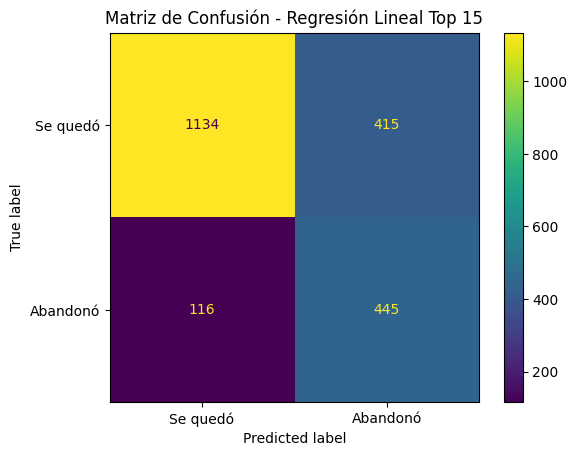

In [347]:
#graficar matriz de confusion
matriz_confusion = confusion_matrix(y_test, y_pred_lr)
visualizacion_matriz = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=['Se quedó', 'Abandonó'])
visualizacion_matriz.plot()
plt.title('Matriz de Confusión - Regresión Lineal Top 15')
plt.show()


# Random Forest Top 15





In [345]:
# Instanciar y entrenar
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_balanced, y_train_balanced)

# Predicciones
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Evaluación
print("Random Forest")
print("Exactitud:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest
Exactitud: 0.762085308056872
ROC AUC: 0.8061396634479838
Matriz de Confusión:
 [[1276  273]
 [ 229  332]]
              precision    recall  f1-score   support

       False       0.85      0.82      0.84      1549
        True       0.55      0.59      0.57       561

    accuracy                           0.76      2110
   macro avg       0.70      0.71      0.70      2110
weighted avg       0.77      0.76      0.76      2110



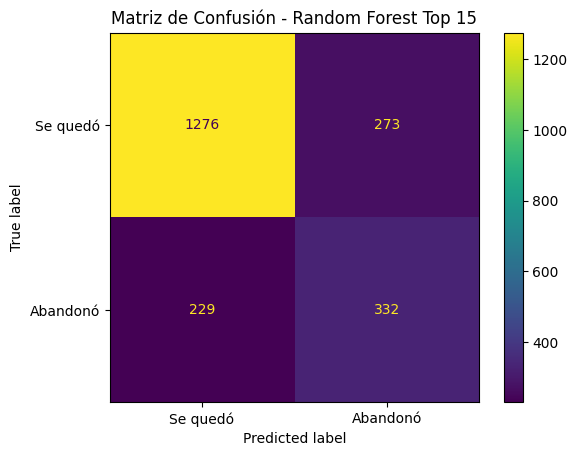

In [348]:
#graficar matriz de confusion
matriz_confusion = confusion_matrix(y_test, y_pred_rf)
visualizacion_matriz = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=['Se quedó', 'Abandonó'])
visualizacion_matriz.plot()
plt.title('Matriz de Confusión - Random Forest Top 15')
plt.show()